In [86]:
# Input the DB to Memory
import pandas as pd
import numpy as np
print("Loading DB...")
data_file = pd.ExcelFile("globalterrorismdb_0616dist.xlsx")
#data_file = pd.ExcelFile("test_data.xlsx")
print("DB Read...")
print(data_file.sheet_names)
dfs = data_file.parse(data_file.sheet_names[0])
print("DB Parsed...")

Loading DB...
DB Read...
['Data']
DB Parsed...


In [87]:
%matplotlib inline
import seaborn as sns
import matplotlib as mp
columns = dfs.columns
total_entries = len(dfs)
for index, col in enumerate(columns):
    print(str(col) + ":" + str(index))

eventid:0
iyear:1
imonth:2
iday:3
approxdate:4
extended:5
resolution:6
country:7
country_txt:8
region:9
region_txt:10
provstate:11
city:12
latitude:13
longitude:14
specificity:15
vicinity:16
location:17
summary:18
crit1:19
crit2:20
crit3:21
doubtterr:22
alternative:23
alternative_txt:24
multiple:25
success:26
suicide:27
attacktype1:28
attacktype1_txt:29
attacktype2:30
attacktype2_txt:31
attacktype3:32
attacktype3_txt:33
targtype1:34
targtype1_txt:35
targsubtype1:36
targsubtype1_txt:37
corp1:38
target1:39
natlty1:40
natlty1_txt:41
targtype2:42
targtype2_txt:43
targsubtype2:44
targsubtype2_txt:45
corp2:46
target2:47
natlty2:48
natlty2_txt:49
targtype3:50
targtype3_txt:51
targsubtype3:52
targsubtype3_txt:53
corp3:54
target3:55
natlty3:56
natlty3_txt:57
gname:58
gsubname:59
gname2:60
gsubname2:61
gname3:62
ingroup:63
ingroup2:64
ingroup3:65
gsubname3:66
motive:67
guncertain1:68
guncertain2:69
guncertain3:70
nperps:71
nperpcap:72
claimed:73
claimmode:74
claimmode_txt:75
claim2:76
claimmode2

In [ ]:
iyear:1
imonth:2
iday:3
extended:5
resolution:6
country:7
country_txt:8
region_txt:10
city:12
success:26
suicide:27
attacktype1_txt:29
attacktype2_txt:31
attacktype3_txt:33
targtype1_txt:35
targsubtype1_txt:37   
target1:39
natlty1_txt:41
targtype2_txt:43
targsubtype2_txt:45
target2:47
natlty2_txt:49
targtype3_txt:51
targsubtype3_txt:53
target3:55
natlty3_txt:57
gname:58
gname2:60
gname3:62
motive:67
nperps:71
weaptype1_txt:84
weapsubtype1_txt:86
weaptype2_txt:88
weapsubtype2_txt:90
weaptype3_txt:92
weapsubtype3_txt:94
weaptype4_txt:96
weapsubtype4_txt:98
nkill:100
nkillter:102
nwound:103
nwoundte:105
property:106
propextent_txt:108
propvalue:109
ishostkid:111
nhostkid:112
nhours:114
ndays:115
divert:116
kidhijcountry:117
ransom:118
ransomamt:119
ransompaid:121
hostkidoutcome_txt:125
nreleased:126

In [88]:
#interesting_columns_dict = {iyear:1, imonth:2, iday:3,extended:5,resolution:6,country:7,country_txt:8,region_txt:10,city:12,
#                            success:26,suicide:27,attacktype1_txt:29,attacktype2_txt:31,attacktype3_txt:33,targtype1_txt:35,
#                            targsubtype1_txt:37,target1:39,natlty1_txt:41,targtype2_txt:43,targsubtype2_txt:45,target2:47,
#                            natlty2_txt:49,targtype3_txt:51,targsubtype3_txt:53,target3:55,natlty3_txt:57,gname:58,gname2:60,
#                            gname3:62,motive:67,nperps:71,weaptype1_txt:84,weapsubtype1_txt:86,weaptype2_txt:88,
#                            weapsubtype2_txt:90,weaptype3_txt:92,weapsubtype3_txt:94,weaptype4_txt:96,weapsubtype4_txt:98,
#                            nkill:100,nkillter:102,nwound:103,nwoundte:105,property:106,propextent_txt:108,propvalue:109,
#                            ishostkid:111,nhostkid:112,nhours:114,ndays:115,divert:116,kidhijcountry:117,ransom:118,
#                            ransomamt:119,ransompaid:121,hostkidoutcome_txt:125, nreleased:126}
hostkid_column = dfs['ishostkid']
year_column = dfs['iyear']
country_column = dfs['country_txt']
targtype_column = dfs['targtype1_txt']
gname_column = dfs['gname']
weaptype_column = dfs['weaptype1_txt']
nkill_column = dfs['nkill']
nkillter_column = dfs['nkillter']
nwound_column = dfs['nwound']
nhostkid_column = dfs['nhostkid']
nhours_column = dfs['nhours']
ndays_column = dfs['ndays']
ransom_column = dfs['ransom']
ransomamt_column = dfs['ransomamt']
ransompaid_column = dfs['ransompaid']
hostkidoutcome_column = dfs['hostkidoutcome_txt']
nreleased_column = dfs['nreleased']
total_kidhij = 0
def isvalid_ncount(total, rel, kill, killter):
    if str(total) == "nan" or str(rel) == "nan" or str(kill) == "nan" or str(killter) == "nan":
        return False
    elif rel<0 or total<0:
        return False
    return True
yearly_count = {}
yearly_country_count = {}
yearly_outcome_count = {}
yearly_nhostkid_nreleased_nkilled_count = {}
yearly_ransom_claimed_paid_count = {}
yearly_duration_count = {}
yearly_gname_count = {}

for index, ishostkid in enumerate(hostkid_column):
    if ishostkid == 0:
        continue
    total_kidhij += 1
    if year_column[index] not in yearly_count:
        yearly_count[year_column[index]] = 1
    else:
        yearly_count[year_column[index]] += 1
        
    if year_column[index] not in yearly_country_count:
        yearly_country_count[year_column[index]] = {}
        yearly_country_count[year_column[index]][country_column[index]] = 1
    else: 
        if country_column[index] not in yearly_country_count[year_column[index]]:
            yearly_country_count[year_column[index]][country_column[index]] = 1
        else:
            yearly_country_count[year_column[index]][country_column[index]] += 1
    
    if year_column[index] not in yearly_outcome_count:
        yearly_outcome_count[year_column[index]] = {}
        yearly_outcome_count[year_column[index]][hostkidoutcome_column[index]] = 1
    else: 
        if hostkidoutcome_column[index] not in yearly_outcome_count[year_column[index]]:
            yearly_outcome_count[year_column[index]][hostkidoutcome_column[index]] = 1
        else:
            yearly_outcome_count[year_column[index]][hostkidoutcome_column[index]] += 1
    
    if isvalid_ncount(nhostkid_column[index], nreleased_column[index], nkill_column[index],nkillter_column[index]):
        if year_column[index] not in yearly_nhostkid_nreleased_nkilled_count:
            yearly_nhostkid_nreleased_nkilled_count[year_column[index]] = [nhostkid_column[index], nreleased_column[index], nkill_column[index],nkillter_column[index]]
        else: 
            yearly_nhostkid_nreleased_nkilled_count[year_column[index]][0] += nhostkid_column[index]
            yearly_nhostkid_nreleased_nkilled_count[year_column[index]][1] += nreleased_column[index]
            yearly_nhostkid_nreleased_nkilled_count[year_column[index]][2] += nkill_column[index]
            yearly_nhostkid_nreleased_nkilled_count[year_column[index]][3] += nkillter_column[index]
    if year_column[index] not in yearly_duration_count:
        yearly_duration_count[year_column[index]] = [ndays_column[index] * 24 + nhours_column[index]]
    else:
        yearly_duration_count[year_column[index]].append(ndays_column[index] * 24 + nhours_column[index])
    
    if year_column[index] not in yearly_gname_count:
        yearly_gname_count[year_column[index]] = {}
        yearly_gname_count[year_column[index]][gname_column[index]] = 1
    else: 
        if gname_column[index] not in yearly_gname_count[year_column[index]]:
            yearly_gname_count[year_column[index]][gname_column[index]] = 1
        else:
            yearly_gname_count[year_column[index]][gname_column[index]] += 1

for index,ransom in enumerate(ransom_column):
    if ransom<=0 or str(ransom) == "nan":
        continue
    if ransomamt_column[index] <= 0 or str(ransomamt_column[index]) == "nan":
        continue
    if ransompaid_column[index] <= 0 or str(ransompaid_column[index]) == "nan":
        continue
    if year_column[index] not in yearly_ransom_claimed_paid_count:
        yearly_ransom_claimed_paid_count[year_column[index]] = [[ransomamt_column[index],ransompaid_column[index]]]
    else:
        yearly_ransom_claimed_paid_count[year_column[index]].append([ransomamt_column[index],ransompaid_column[index]])


{1970: 52, 1971: 27, 1972: 29, 1973: 72, 1974: 91, 1975: 57, 1976: 78, 1977: 107, 1978: 186, 1979: 253, 1980: 251, 1981: 235, 1982: 250, 1983: 218, 1984: 163, 1985: 182, 1986: 132, 1987: 134, 1988: 131, 1989: 170, 1990: 183, 1991: 245, 1992: 203, 1994: 237, 1995: 172, 1996: 193, 1997: 341, 1998: 71, 1999: 163, 2000: 180, 2001: 199, 2002: 104, 2003: 84, 2004: 95, 2005: 147, 2006: 253, 2007: 277, 2008: 448, 2009: 376, 2010: 468, 2011: 409, 2012: 387, 2013: 677, 2014: 1547, 2015: 1376}
11653


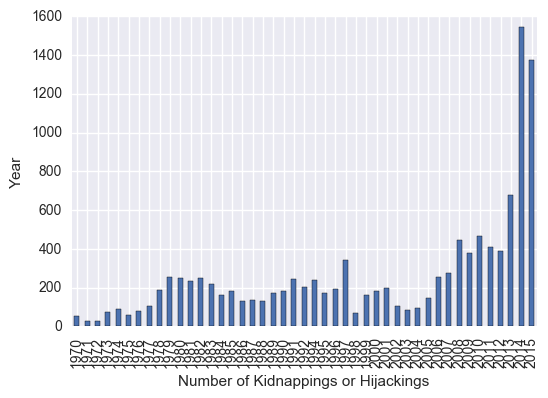

In [89]:
print(yearly_count)
print(total_kidhij)
#mp.rcParams.update({'figure.autolayout': True})
df = pd.DataFrame.from_dict(yearly_count, orient='index')
g = df.plot(kind='bar', legend=False)
g.xaxis.set_label_text("Number of Kidnappings or Hijackings")
g.yaxis.set_label_text("Year")

['Colombia', 'India', 'Afghanistan', 'Pakistan', 'Iraq', 'Philippines', 'Nigeria', 'El Salvador', 'Yemen', 'Somalia', 'Guatemala', 'Libya', 'United States', 'Peru', 'Sudan', 'Algeria', 'Lebanon', 'Syria', 'Turkey', 'Other']
[10.85557367201579, 9.233673732086158, 7.663262679138419, 6.908092336737321, 6.667810864155153, 5.0201664807345745, 3.501244314768729, 3.166566549386424, 2.831888784004119, 2.6860036042220887, 2.3084184330215396, 2.3084184330215396, 2.0166480734574788, 1.9308332618209902, 1.845018450184502, 1.6304814210932808, 1.6218999399296319, 1.56182957178409, 1.5189221659658456, 24.723247232472325]


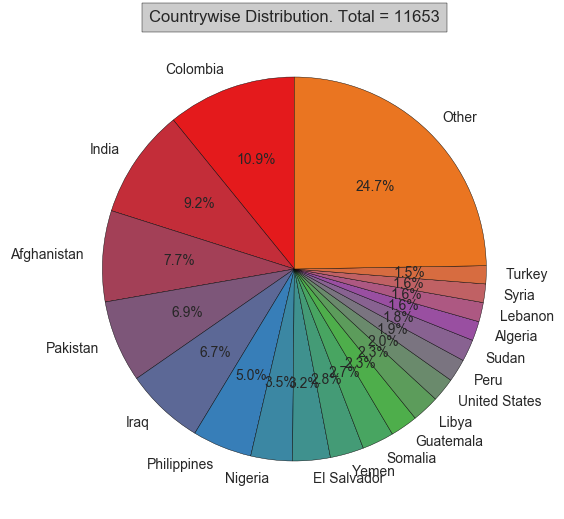

In [90]:
#print(yearly_country_count)
country_count = {}
a=np.random.random(40)
cs=mp.cm.Set1(np.arange(40)/40.)
for key in yearly_country_count:
    count = 0
    for key2 in yearly_country_count[key]:
        count += yearly_country_count[key][key2]
        if key2 not in country_count:
            country_count[key2] = yearly_country_count[key][key2]
        else: 
            country_count[key2] += yearly_country_count[key][key2]
    if count !=  yearly_count[key]:
        print("Error in year : " + str(key))

from pylab import *
import operator

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

sorted_country_dict = sorted(country_count.items(), key=operator.itemgetter(1),reverse=True)
#print(sorted_country_dict)

labels = []
fracs = []
accum = 0
others = 0.25 * total_kidhij
index = 0

while(accum <= total_kidhij - others):
    labels.append(sorted_country_dict[index][0])
    fracs.append(sorted_country_dict[index][1] * 100 / total_kidhij)
    accum += sorted_country_dict[index][1]
    index += 1

labels.append("Other")
fracs.append( (total_kidhij - accum) * 100 / total_kidhij)
print(labels)
print(fracs)
# The slices will be ordered and plotted counter-clockwise.
#explode=(0, 0.05, 0, 0)
pie(fracs, labels=labels,
              autopct='%1.1f%%', shadow=False, startangle=90, colors=cs)
                    # The default startangle is 0, which would start
                    # the Frogs slice on the x-axis.  With startangle=90,
                    # everything is rotated counter-clockwise by 90 degrees,
                    # so the plotting starts on the positive y-axis.

title('Countrywise Distribution. Total = ' + str(total_kidhij), bbox={'facecolor':'0.8', 'pad':5})
show()

11653
['Hostage(s) released by perpetrators', 'Hostage(s) killed (not during rescue attempt)', 'Combination', 'Successful Rescue', 'Hostage(s) escaped (not during rescue attempt)', 'Attempted Rescue']
[43.78126617215801, 32.9998274969812, 13.282732447817837, 7.3486286010005175, 2.346041055718475, 0.24150422632396068]


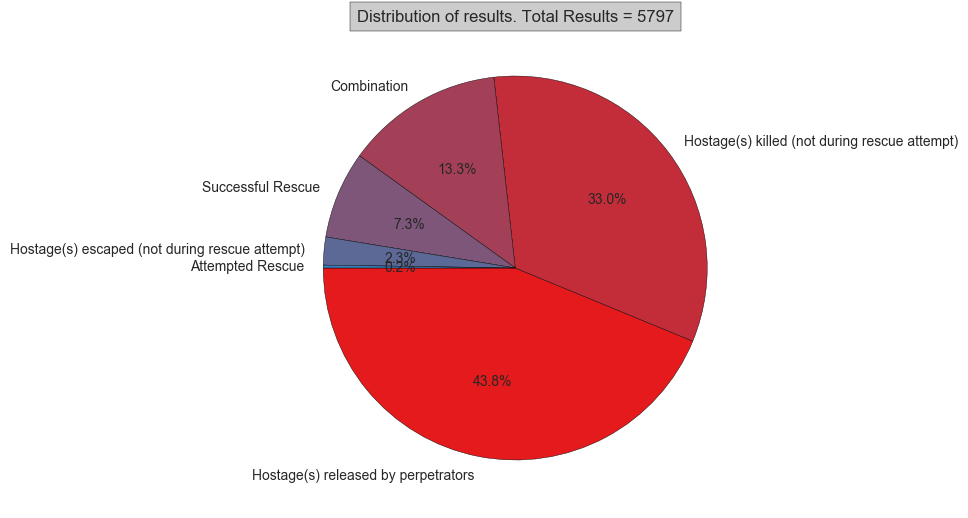

In [91]:
a=np.random.random(40)
cs=mp.cm.Set1(np.arange(40)/40.)
#print(yearly_outcome_count)
country_count = {}
total_count = 0
for key in yearly_outcome_count:
    count = 0
    for key2 in yearly_outcome_count[key]:
        count += yearly_outcome_count[key][key2]
        if key2 not in country_count:
            country_count[key2] = yearly_outcome_count[key][key2]
        else: 
            country_count[key2] += yearly_outcome_count[key][key2]
    if count !=  yearly_count[key]:
        print("Error in year : " + str(key))
    total_count+=count

print(total_count)
from pylab import *
import operator

figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

sorted_outcome_dict = sorted(country_count.items(), key=operator.itemgetter(1),reverse=True)
#print(sorted_outcome_dict)

labels = []
fracs = []
unknown = 0

for tuples in sorted_outcome_dict:
    if tuples[0] == "." or tuples[0] == "Unknown":
        unknown += tuples[1]

for tuples in sorted_outcome_dict:
    if tuples[0] != "." and tuples[0] != "Unknown":
        labels.append(tuples[0])
        fracs.append(tuples[1]*100/(total_kidhij-unknown))

print(labels)
print(fracs)
# The slices will be ordered and plotted counter-clockwise.
#explode=(0, 0.05, 0, 0)
pie(fracs, labels=labels,
              autopct='%1.1f%%', shadow=False, startangle=180, colors=cs)
                    # The default startangle is 0, which would start
                    # the Frogs slice on the x-axis.  With startangle=90,
                    # everything is rotated counter-clockwise by 90 degrees,
                    # so the plotting starts on the positive y-axis.

title('Distribution of results. Total Results = ' + str((total_kidhij-unknown)), bbox={'facecolor':'0.8', 'pad':5})
show()

In [39]:
print(yearly_nhostkid_nreleased_nkilled_count)

{1984: [386.0, 382.0, 13.0, 7.0], 1985: [315.0, 314.0, 1.0, 0.0], 1986: [36.0, 14.0, 45.0, 5.0], 1987: [6.0, 6.0, 0.0, 0.0], 1988: [182.0, 180.0, 38.0, 0.0], 1989: [2.0, 2.0, 12.0, 12.0], 1992: [1.0, 1.0, 1.0, 1.0], 1994: [70.0, 70.0, 3.0, 3.0], 1995: [25.0, 25.0, 1.0, 1.0], 1996: [214.0, 214.0, 0.0, 0.0], 1997: [82.0, 82.0, 2.0, 2.0], 1998: [488.0, 369.0, 66.0, 1.0], 1999: [1096.0, 1107.0, 76.0, 5.0], 2000: [1090.0, 997.0, 91.0, 8.0], 2001: [2041.0, 1505.0, 3250.0, 55.0], 2002: [1148.0, 958.0, 239.0, 43.0], 2003: [559.0, 441.0, 106.0, 12.0], 2004: [1691.0, 1207.0, 543.0, 37.0], 2005: [431.0, 420.0, 128.0, 3.0], 2006: [881.0, 544.0, 150.0, 10.0], 2007: [918.0, 695.0, 314.0, 24.0], 2008: [2401.0, 1394.0, 342.0, 42.0], 2009: [2925.0, 2369.0, 332.0, 16.0], 2010: [1863.0, 688.0, 386.0, 19.0], 2011: [1180.0, 740.0, 245.0, 8.0], 2012: [1104.0, 890.0, 494.75, 38.75], 2013: [2444.0, 1911.9999999999998, 657.49999999999989, 109.0], 2014: [6979.0, 2793.0000000000009, 4765.0, 234.0], 2015: [5921.0

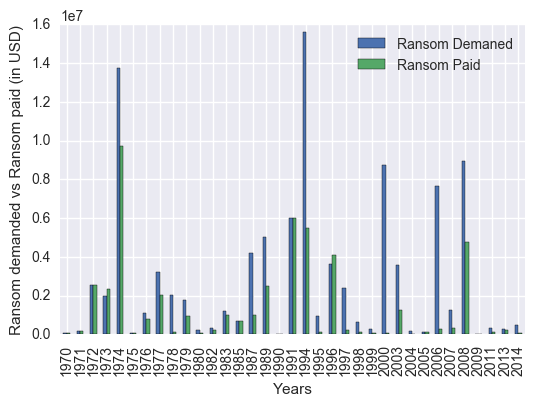

In [92]:
#print(yearly_ransom_claimed_paid_count)
yearly_mean_ransom = {}
for key in yearly_ransom_claimed_paid_count:
    year_ransom_sum=0
    year_paid_sum=0
    count=0
    for tuples in yearly_ransom_claimed_paid_count[key]:
        year_ransom_sum += tuples[0]
        year_paid_sum += tuples[1]
        count += 1
    yearly_mean_ransom[key] = (year_ransom_sum/count, year_paid_sum/count)
#print(yearly_mean_ransom)

year_list = []
ransom_tuple_list = []
for year in range(1970,2015):
    if year in yearly_mean_ransom:
        year_list.append(year)
        ransom_tuple_list.append(yearly_mean_ransom[year])

df = pd.DataFrame(ransom_tuple_list,year_list)
g = df.plot(kind='bar', legend=True,sort_columns=True)
g.xaxis.set_label_text("Years")
g.yaxis.set_label_text("Ransom demanded vs Ransom paid (in USD)")
g.legend(['Ransom Demaned','Ransom Paid'])

In [93]:
a=np.random.random(40)
cs=mp.cm.Set1(np.arange(40)/40.)
#print(yearly_gname_count)
country_count = {}
total_count = 0
for key in yearly_gname_count:
    count = 0
    for key2 in yearly_gname_count[key]:
        count += yearly_gname_count[key][key2]
        if key2 not in country_count:
            country_count[key2] = yearly_gname_count[key][key2]
        else: 
            country_count[key2] += yearly_gname_count[key][key2]
    if count !=  yearly_count[key]:
        print("Error in year : " + str(key))
    total_count+=count

print(total_count)
total = total_count - country_count["Unknown"]
from pylab import *
import operator

sorted_outcome_dict = sorted(country_count.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_outcome_dict)


11653
[('Unknown', 3567), ('Taliban', 635), ('Revolutionary Armed Forces of Colombia (FARC)', 397), ('Islamic State of Iraq and the Levant (ISIL)', 369), ('National Liberation Army of Colombia (ELN)', 346), ('Communist Party of India - Maoist (CPI-Maoist)', 315), ('Al-Shabaab', 247), ("New People's Army (NPA)", 230), ('Maoists', 195), ('Farabundo Marti National Liberation Front (FMLN)', 165), ('Boko Haram', 163), ('Shining Path (SL)', 157), ('Tehrik-i-Taliban Pakistan (TTP)', 152), ('Abu Sayyaf Group (ASG)', 139), ("Kurdistan Workers' Party (PKK)", 137), ('M-19 (Movement of April 19)', 122), ("Lord's Resistance Army (LRA)", 117), ('Huthi Extremists', 105), ('Basque Fatherland and Freedom (ETA)', 91), ('Popular Liberation Army (EPL)', 80), ('Janjaweed', 78), ('Al-Qaida in the Arabian Peninsula (AQAP)', 72), ("Donetsk People's Republic", 68), ('Irish Republican Army (IRA)', 57), ('Liberation Tigers of Tamil Eelam (LTTE)', 54), ('Al-Nusrah Front', 50), ('National Union for the Total Indep

['Taliban', 'Revolutionary Armed Forces of Colombia (FARC)', 'Islamic State of Iraq and the Levant (ISIL)', 'National Liberation Army of Colombia (ELN)', 'Communist Party of India - Maoist (CPI-Maoist)', 'Al-Shabaab', "New People's Army (NPA)", 'Maoists', 'Farabundo Marti National Liberation Front (FMLN)', 'Boko Haram', 'Shining Path (SL)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Abu Sayyaf Group (ASG)', "Kurdistan Workers' Party (PKK)", 'M-19 (Movement of April 19)', "Lord's Resistance Army (LRA)", 'Huthi Extremists', 'Basque Fatherland and Freedom (ETA)', 'Other']
[7.8530793964877565, 4.90972050457581, 4.563442987880287, 4.27900074202325, 3.895622062824635, 3.054662379421222, 2.8444224585703686, 2.4115755627009645, 2.040563937670047, 2.0158298293346526, 1.941627504328469, 1.8797922334899826, 1.7190205293099183, 1.6942864209745239, 1.5087806084590651, 1.4469453376205788, 1.2985406876082117, 1.1254019292604502, 49.51768488745981]
['Taliban', 'Revolutionary Armed Forces of Colombia (FARC)',

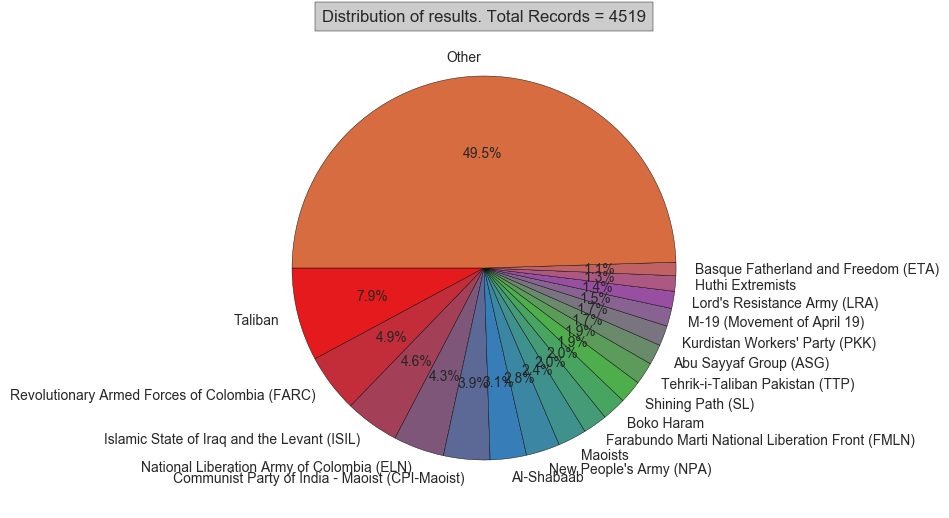

In [95]:
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

accum = 0
others = 0.5 * total
index = 0
labels = []
fracs = []
while(accum <= total - others):
    if sorted_outcome_dict[index][0] != "Unknown":    
        labels.append(sorted_outcome_dict[index][0])
        fracs.append(sorted_outcome_dict[index][1] * 100 / total)
        accum += sorted_outcome_dict[index][1]
    index += 1

labels.append("Other")
fracs.append( (total - accum) * 100 / total)
print(labels)
print(fracs)

print(labels)
print(fracs)
# The slices will be ordered and plotted counter-clockwise.
#explode=(0, 0.05, 0, 0)
pie(fracs, labels=labels,
              autopct='%1.1f%%', shadow=False, startangle=180, colors=cs)
                    # The default startangle is 0, which would start
                    # the Frogs slice on the x-axis.  With startangle=90,
                    # everything is rotated counter-clockwise by 90 degrees,
                    # so the plotting starts on the positive y-axis.

title('Distribution of results. Total Records = ' + str(total-country_count["Unknown"]), bbox={'facecolor':'0.8', 'pad':5})
show()